In [205]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [206]:
# Read Data

In [207]:
df = pd.read_csv('hospital_data.csv')

In [208]:
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,11/4/2019 0:00,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001
1,11/6/2019 0:00,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002
2,11/2/2019 0:00,$660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003
3,11/6/2019 0:00,$600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004
4,11/1/2019 0:00,$591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005


In [209]:
 df.dtypes

Date                      object
 Medication Revenue       object
  Lab Cost                object
 Consultation Revenue     object
Doctor Type               object
Financial Class           object
Patient Type              object
Entry Time                object
Post-Consultation Time    object
Completion Time           object
Doctor                    object
Patient ID                object
dtype: object

In [210]:
# Datetime formating

In [211]:
df['Date'] = pd.to_datetime(df['Date']) 

In [212]:
df.dtypes

Date                      datetime64[ns]
 Medication Revenue               object
  Lab Cost                        object
 Consultation Revenue             object
Doctor Type                       object
Financial Class                   object
Patient Type                      object
Entry Time                        object
Post-Consultation Time            object
Completion Time                   object
Doctor                            object
Patient ID                        object
dtype: object

In [213]:
df.columns = df.columns.str.lstrip(' ')

In [214]:
df['Post-Consultation Time'] = pd.to_datetime(df['Post-Consultation Time']) 
df['Completion Time'] = pd.to_datetime(df['Completion Time'])
df['Entry Time'] = pd.to_datetime(df['Entry Time'])



In [215]:
df.dtypes

Date                      datetime64[ns]
Medication Revenue                object
Lab Cost                          object
Consultation Revenue              object
Doctor Type                       object
Financial Class                   object
Patient Type                      object
Entry Time                datetime64[ns]
Post-Consultation Time    datetime64[ns]
Completion Time           datetime64[ns]
Doctor                            object
Patient ID                        object
dtype: object

In [216]:
def clean_text(x):
    x = x.replace('$','')
    x = x.replace(',','')
    x = x.replace('-','')
    x = x.replace(' ','')
    x = pd.to_numeric(x)
    return x

In [217]:
df.columns = df.columns.str.rstrip(' ')

In [218]:
df['Medication Revenue'] = df['Medication Revenue'].apply(clean_text)

In [219]:
df['Lab Cost'] = df['Lab Cost'].apply(clean_text)

In [220]:
df['Consultation Revenue'] = df['Consultation Revenue'].apply(clean_text)

In [221]:
df.dtypes

Date                      datetime64[ns]
Medication Revenue               float64
Lab Cost                         float64
Consultation Revenue             float64
Doctor Type                       object
Financial Class                   object
Patient Type                      object
Entry Time                datetime64[ns]
Post-Consultation Time    datetime64[ns]
Completion Time           datetime64[ns]
Doctor                            object
Patient ID                        object
dtype: object

In [228]:
df.isna().sum()

Date                          0
Medication Revenue        11937
Lab Cost                  28566
Consultation Revenue       5576
Doctor Type                   0
Financial Class               0
Patient Type                  0
Entry Time                    0
Post-Consultation Time        0
Completion Time               0
Doctor                        0
Patient ID                    0
dtype: int64

In [229]:
df = df.fillna(0)  

In [230]:
# Create Total Revenue Column

In [231]:
df['Total Revenue'] = df['Medication Revenue'] + df['Consultation Revenue'] + df['Lab Cost']

# What time has the most visitors

In [232]:
df['Entry Hour'] = df['Entry Time'].dt.hour

In [233]:
pivot1 = df.groupby(df['Entry Hour'])['Patient ID'].count()

<AxesSubplot:xlabel='Entry Hour'>

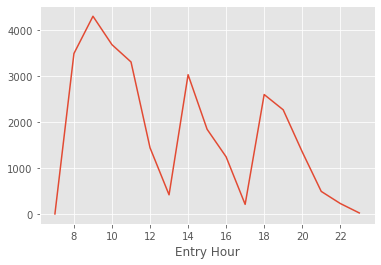

In [234]:
plt.style.use('ggplot')
df.groupby(df['Entry Hour'])['Patient ID'].count().plot()

# Total Revenue and Total Visitors Correlation

In [235]:
pivot2 = df.groupby(df['Entry Hour'])['Total Revenue'].sum()

<AxesSubplot:xlabel='Entry Hour'>

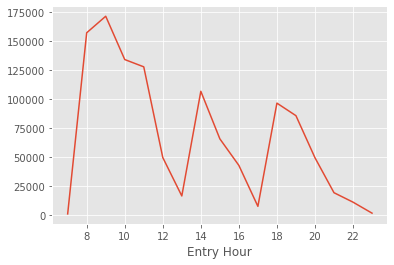

In [236]:
plt.style.use('ggplot')
df.groupby(df['Entry Hour'])['Total Revenue'].sum().plot()

In [237]:
pivot3 = df.groupby(df['Entry Hour']).sum()
pivot4 = df.groupby(df['Entry Hour']).count()

In [238]:
merge = pivot3.merge(pivot4,on = 'Entry Hour')

In [239]:
merge.head()

,Medication Revenue_x,Lab Cost_x,Consultation Revenue_x,Total Revenue_x,Date,Medication Revenue_y,Lab Cost_y,Consultation Revenue_y,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue_y
Entry Hour,,,,,,,,,,,,,,,,,
7,350.66,520.00,198.63,1069.29,12,12,12,12,12,12,12,12,12,12,12,12,12
8,83404.62,22475.27,51180.15,157060.04,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489
9,96195.61,14879.28,60216.56,171291.45,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297
10,75239.66,6688.98,52072.67,134001.31,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680
11,72675.83,6860.23,48192.03,127728.09,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306


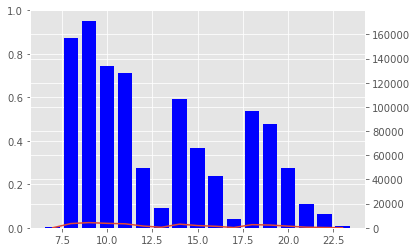

In [241]:
fig, ax1 = plt.subplots()
ax1 = ax1.twinx()
ax1.bar(merge.index,merge['Total Revenue_x'],color = 'blue')
ax1.plot(merge.index,merge['Patient ID'])

# What Percentage of Revenue Come from different Insurance Types

In [244]:
pivot5 = df.groupby('Financial Class').sum()

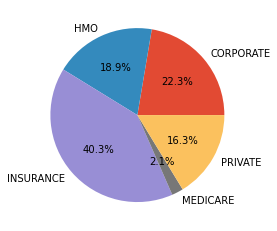

In [248]:
plt.pie(pivot5['Total Revenue'],labels = pivot5.index,autopct = '%1.1f%%');